## Principal Component Analysis
- Reduction of vector representation of higher dimension to lower dimension
- Through dimensionality reduction
- Original Space -> Uncorrelated Features -> Dimension Reduction
- Using orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components
- SVD of the Covariance matrix of the dataset
- Eigen vectors are used as a rotation matrix
- Arranged in decreasing order to its explained variance

**Algorithm**.  
- Eigen Vector(U): Uncorrelated features for your data (Taken from covariance of the features). It gives direction of uncorrelated features.
- Eigen Value(S): The amount of information retained by each feature (Variance of the feature)

1. Mean normalize the data
2. Get covariance Matrix
3. Perform Singular Value Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random

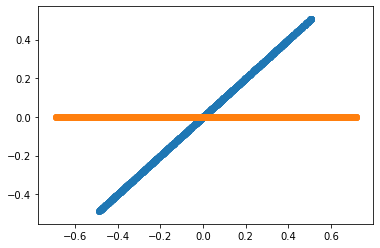

In [2]:
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({
    'x': x, 'y': y
})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)

# create the transformation model for this data. Internally, it gets the rotation
# matrix and explained variance
pca_tr = pca.fit(data)

rotated_data = pca_tr.transform(data)
# Transform the data base on the rtation matrix of pca_tr 

# Create a dataframe with the new variables. We call these new variables PC1 and PC2
data_pca = pd.DataFrame(data=rotated_data, columns=['PC1', 'PC2'])

plt.scatter(data_pca.PC1, data_pca.PC2)
plt.show()

### Transformation Model pca_tr
- PCA model composed of rotatin matrix and its corresponding explained variance

In [3]:
print('Eigen vectors or PC: 1st row in the direction o [1, n]')
print(pca_tr.components_)

Eigen vectors or PC: 1st row in the direction o [1, n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [5]:
print('Eigen values or explained varience')
pca_tr.explained_variance_

Eigen values or explained varience


array([1.60798373e-01, 1.43512706e-34])

$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y)  \ 0] = [0.0833 + 0.0833 \  0] = [0.166 \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component.

### Correlated Normal Random Variables
- Use controlled dataset composed of 2 variables with different variance and with a specific covariance
- To get such a dataset, Create 2 independent random variables with desired variance
- Then combine those variables using a rotation matrix
- The new resulting variable will be a linear combination of the original random variables and dependent and correlated

In [7]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

angle: 45.0
Rotation Matrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Shape of xy: (1000, 2)


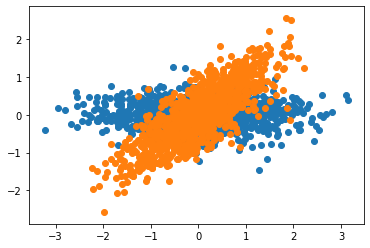

In [10]:
random.seed(100)
std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

x = x - np.mean(x)
y = y - np.mean(y)

# Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance
angle = np.arctan(1/n) # Convert the covariance to an angle
print(f'angle: {angle * 180 / math.pi}')

# Create a rotation matrix using the given angle
rotation_matrix = np.array([
    [np.cos(angle), np.sin(angle)],
    [-np.sin(angle), np.cos(angle)]
])

print('Rotation Matrix')
print(rotation_matrix)

xy = np.concatenate(([x], [y]), axis=0).T # Create a matrix with columns x and y
print(f'Shape of xy: {xy.shape}')
# Transform the data using the rotation matrix. It correlates the two variables
plt.scatter(xy[:,0], xy[:,1])
data = xy @ rotation_matrix

plt.scatter(data[:, 0], data[:, 1])
plt.show()


- Print the original and the resuliting transformed system using the result of PCA
- Used the same plot with 2 PC vectors in red and blue

Eigen ectors or PC: first row in the direction [1, n]
[[-0.70949732 -0.70470813]
 [ 0.70470813 -0.70949732]]
Eigen Values or Explained Variance
[1.02113679 0.11233356]


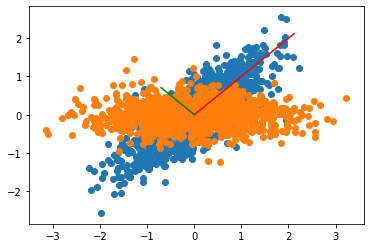

In [13]:
plt.scatter(data[:, 0], data[:, 1])

# Apply PCA. In theory, the eigenvector matrix must be the
# inverse of the original rotation matrix
pca = PCA(n_components=2) # Instantiate a PCA, Choose to get 2 output variables

# Create the transformation model for thsi data
# Internally it gets the rotation matrix and the explained variance
pca_tr = pca.fit(data)

# Create an array with the transformed data
data_pca = pca_tr.transform(data)

print('Eigen ectors or PC: first row in the direction [1, n]')
print(pca_tr.components_)

print('Eigen Values or Explained Variance')
print(pca_tr.explained_variance_)

# Print the rotated data
plt.scatter(data_pca[:, 0], data_pca[:, 1])

# Plot the first compenent axe, use the explained variance to scale the vector
plt.plot(
    [0, rotation_matrix[0][0] * std1 * 3],
    [0, rotation_matrix[0][1] * std1 * 3],
    'k-', color='red'
)
plt.plot(
    [0, rotation_matrix[1][0] * std2 * 3],
    [0, rotation_matrix[1][1] * std2 * 3],
    'k-', color='green'
)
plt.show()

The explanation of this chart is as follows:
* The rotation matrix used to create our correlated variables took the original uncorrelated variables `x` and `y` and transformed them into the blue points.
* The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.
* The explained Variance of the PCA is 

$$[1.0094, 0.1125] $$

which is approximately

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

the parameters of our original random variables x and y

You can use the previous code to try with other standard deviations and correlations and convince your self of this fact.   

### PCA strategy for Dimensionality Reduction
- The PC contains the rotation matrix, 
- Theya re sorted decreasing on its explained variance
- Means, 1st component retain most of the power od the data to explain the patterns that generalize the data
- Interest are the patterns that explain much less variance for example novelty detection

Let us visualize the original data dn its corresponding projection over the 1st and 2nd PCs. ie Data comprised of a single variable

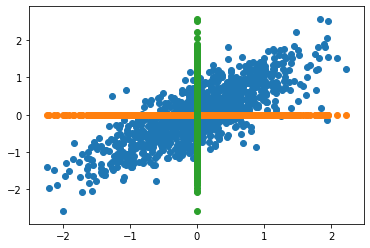

In [16]:
n_points = len(data)

# Plot the original data in blue
plt.scatter(data[:, 0], data[:, 1])

# Plot the projection along the first component in orange
plt.scatter(data[:, 0], np.zeros(n_points))

# Plot the projection along the second component in green
plt.scatter(np.zeros(n_points), data[:,1])

plt.show()